Problem 2. 
There is a fair coin that has an equal probability of landing heads or tails (50:50). You are a casino manager, and you want to design a game that uses this coin. The game must be slightly advantageous to the casino, with a winning ratio of each individual game not exceeding 60%.

(a) Design a game using the fair coin that satisfies the above condition.  
(b) Unfortunately, some sneaky players want to cheat on you by using a rigged coin that has a higher probability of landing heads (55%). Can you detect if they are using a cheating coin? If so, how?  
(c) Write a Python code that simulates both problem 2-(a) and 2-(b)

Solution.  
[Penny Game]
* Dealer and Player take turns flipping a coin
* The first person to get two heads in a row wins.
* The Dealer always starts first.

Expected Winning Ratio

The probability of getting one step ahead during one's turn (assuming that winning one step is considered progress, and to achieve final victory, one must win two steps)
$$
p = 1/2 + 1/2^3 + 1/2^5 + ... = 2/3
$$

If the dealer wins one step during their turn, and the player loses one step during their turn, the dealer acquires two heads, achieving final victory.
- *Win Win:* $p(1-p)$

If the dealer wins one step during their turn, and the player wins one step during their turn, the dealer must win one more step during the subsequent turn to achieve final victory. 
- *Win Lose Win:* $p^3$

If the dealer fails to win during their turn, and the player also fails to win during their turn, if the dealer wins during the subsequent turn, they achieve final victory.  
- *Lose Win Win:* $(1-p)^2p$ 

$$\therefore  6/27 + 8/27 + 2/27 = 16/27 = 0.59259$$

Expected Winning Ratio

자기 차례에서 앞면이 한 번 나올 확률 (앞면이 한 번 나오면 한 스탭을 이겼다고 하자. 최종 우승 하기 위해서는 두 스탭을 이겨야 함.)
$$
p = 1/2 + 1/2^3 + 1/2^5 + ... = 2/3
$$

딜러가 자기 차례에서 한 스탭의 우승을 하고, 플레이어가 자기 차례에서 한 스텝의 패를 하면, 딜러는 앞면을 두 번 획득하여 최종 우승을 함.  
- *Win Win:* $p(1-p)$

딜러가 자기 차례에서 한 스탭의 우승을 하고, 플레이어가 자기 차례에서 한 스탭의 우승을 하면, 딜러는 그 다음 차례에서 또 한 스탭의 우승을 해야 최종 우승을 함.  
- *Win Lose Win:* $p^3$

딜러가 자기 차례에서 우승을 하지 못하고, 플레이어가 자기 차례에서 우승을 하지 못한 후, 딜러가 그 다음 차례에서 우승을 하면 최종 우승을 함.  
- *Lose Win Win:* $(1-p)^2p$ 

$$\therefore  6/27 + 8/27 + 2/27 = 16/27 = 0.59259$$

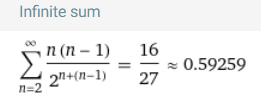

In [3]:
import random

In [4]:
class Coin:
    def __init__(self, biased:float=0):
        self.biased = biased
        
    def toss(self)->str:
        return 'H' if random.gauss(self.biased, 1.0) > 0 else 'T'

class Player():
    def __init__(self):
        self.num_heads = 0
        self.num_wins = 0

    def init_status(self):
        self.num_heads = 0

    def is_winner(self)->bool:
        return self.num_heads >= 2

    def toss(self, coin: Coin()):
        if coin.toss() == 'H':
            self.num_heads += 1
            return 'H'
        return 'T'

def watchdog(dealer: Player(), player: Player(), threshold:float=0.5):
    if dealer.num_wins+player.num_wins == 0: return False
    
    winning_ratio = dealer.num_wins/(dealer.num_wins+player.num_wins) 
    if winning_ratio < threshold: return True
    return False

def game(coin: Coin(), dealer: Player(), player: Player()):
    dealer.init_status()
    player.init_status()

    round = 0
    while True:
        round += 1

        dealer.toss(coin)
        if dealer.is_winner():
            # print(f"Dealer wins by {round} rounds")
            dealer.num_wins += 1
            return True

        player.toss(coin)
        if player.is_winner():
            # print(f"Player wins by {round} rounds")
            player.num_wins += 1
            return False

        if watchdog(dealer, player):
            print(f"Watchdog works")
            return False


In [5]:
coin = Coin()
dealer = Player()
player = Player()
for i in range(100000):
    game(coin, dealer, player)

print(f"dealer: {dealer.num_wins}")
print(f"player: {player.num_wins}")
print(f"p = {dealer.num_wins/(dealer.num_wins+player.num_wins)}")

dealer: 59297
player: 40703
p = 0.59297
